In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
def read_data_from_file():
  df = pd.read_csv("data multiple variables.txt", header=None, names=['Size', 'Bedrooms', 'Profit'], dtype=float)

  return np.array(df[['Size', 'Bedrooms']]), np.array(df[['Profit']])

In [3]:
def feature_normalization(X,mean_size, mean_rooms, std_size, std_rooms):
  X[:, 1] = np.divide(np.subtract(X[:, 1],mean_size),std_size)
  X[:, 2] = np.divide(np.subtract(X[:, 2],mean_rooms),std_rooms)
  

In [ ]:
def hypothesis(X, theta):
  return np.dot(X, theta)

def cost_function(X, y, theta):
  return ((hypothesis(X, theta) - y).T.dot(hypothesis(X, theta) - y))/2*len(y)

def gradient(X, y, theta):
  return (X.T.dot(hypothesis(X, theta) - y))/len(y)


In [ ]:
def gradient_descent(learning_rate, number_of_iterations, X, y):
  theta = np.zeros((3,1))
  cost = []

  for iteration in range(number_of_iterations):
    cost.append((cost_function(X, y, theta))[0])
    theta = theta - learning_rate*gradient(X, y, theta)

  plt.plot(range(number_of_iterations), cost)
  plt.xlabel("iterations")
  plt.ylabel("Cost J(0)")

  return theta

def normal_equation(X, y):
  x_transpose = np.transpose(X)
  inverse = np.linalg.pinv(x_transpose.dot(X))
  return inverse.dot(x_transpose.dot(y))

[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]
 [1.000e+00 1.940e+03 4.000e+00]
 [1.000e+00 2.000e+03 3.000e+00]
 [1.000e+00 1.890e+03 3.000e+00]
 [1.000e+00 4.478e+03 5.000e+00]
 [1.000e+00 1.268e+03 3.000e+00]
 [1.000e+00 2.300e+03 4.000e+00]
 [1.000e+00 1.320e+03 2.000e+00]
 [1.000e+00 1.236e+03 3.000e+00]
 [1.000e+00 2.609e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 1.767e+03 3.000e+00]
 [1.000e+00 1.888e+03 2.000e+00]
 [1.000e+00 1.604e+03 3.000e+00]
 [1.000e+00 1.962e+03 4.000e+00]
 [1.000e+00 3.890e+03 3.000e+00]
 [1.000e+00 1.100e+03 3.000e+00]
 [1.000e+00 1.458e+03 3.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]
 [1.000e+00 2.200e+03 3.000e+00]
 [1.000e+00 2.637e+03 3.000e+00]
 [1.000e+0

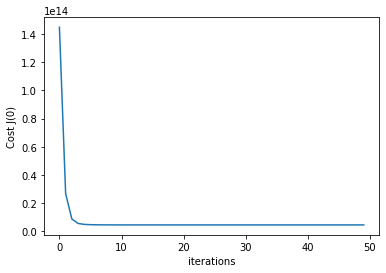

In [ ]:

X, y = read_data_from_file()

X=np.insert(X,0,1.0,axis=1)

from copy import copy, deepcopy
X_unscaled = deepcopy(X)

mean_size = np.mean(X[:, 1])
mean_rooms = np.mean(X[:, 2])
std_size = np.std(X[:, 1])
std_rooms = np.std(X[:, 2])

feature_normalization(X, mean_size, mean_rooms, std_size, std_rooms)

alpha = 0.6
iterations = 50

theta_iterative = gradient_descent(alpha, iterations, X, y)

theta_normal_equation = normal_equation(X_unscaled, y)

features = np.array([(1.0, 1650.0, 3.0)])

print("Normal equation prediction: ")
print(hypothesis(features, theta_normal_equation))

feature_normalization(features, mean_size, mean_rooms, std_size, std_rooms)

print("Iterative prediction: ")
print(hypothesis(features, theta_iterative))
